In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
bank0 = pd.read_csv("bank-marketing-v4.csv")

In [3]:
type(bank0)

pandas.core.frame.DataFrame

### Some basic information about the data

In [4]:
bank0.head()

,age,job,salary,marital,education,default,balance,housing,loan,contact,poutcome,response
0,20.0,admin.,50000,single,secondary,no,336,no,yes,cellular,unknown,No
1,21.0,admin.,50000,single,tertiary,no,242,no,yes,cellular,unknown,No
2,21.0,admin.,50000,single,secondary,no,66,yes,no,cellular,failure,No
3,21.0,admin.,50000,single,secondary,no,325,yes,no,unknown,unknown,No
4,21.0,admin.,50000,single,secondary,no,524,no,no,cellular,unknown,Yes


In [5]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44950 entries, 0 to 44949
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44938 non-null  float64
 1   job        44950 non-null  object 
 2   salary     44950 non-null  int64  
 3   marital    44950 non-null  object 
 4   education  44950 non-null  object 
 5   default    44950 non-null  object 
 6   balance    44950 non-null  int64  
 7   housing    44950 non-null  object 
 8   loan       44950 non-null  object 
 9   contact    44950 non-null  object 
 10  poutcome   44950 non-null  object 
 11  response   44947 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.1+ MB


## Handling missing values

In [6]:
bank1 = bank0.copy()

#### 1. `age` field

In [7]:
bank1.age.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
44945    False
44946    False
44947    False
44948    False
44949    False
Name: age, Length: 44950, dtype: bool

In [8]:
bank1[bank1.age.isnull()]

,age,job,salary,marital,education,default,balance,housing,loan,contact,poutcome,response
2554,NaN,admin.,50000,married,unknown,no,664,no,no,cellular,unknown,No
2557,NaN,admin.,50000,divorced,secondary,no,936,no,no,cellular,unknown,Yes
2561,NaN,admin.,50000,married,secondary,no,2254,no,no,telephone,unknown,No
2564,NaN,admin.,50000,married,secondary,no,100,yes,no,cellular,unknown,No
2567,NaN,admin.,50000,married,secondary,no,1133,yes,no,cellular,failure,No
2573,NaN,admin.,50000,married,secondary,no,0,yes,no,cellular,unknown,No
2578,NaN,admin.,50000,married,secondary,no,16517,no,no,cellular,failure,No
2581,NaN,admin.,50000,married,secondary,no,8238,yes,yes,cellular,other,No
2582,NaN,admin.,50000,married,secondary,no,12,yes,no,cellular,unknown,No
2588,NaN,admin.,50000,single,secondary,no,483,yes,yes,cellular,unknown,No


In [9]:
bank1.age.mean()

42.38424050914593

In [10]:
avg_age = round(bank1.age.mean())
avg_age

42

In [11]:
bank1.age.fillna(avg_age, inplace=True)

In [12]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44950 entries, 0 to 44949
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44950 non-null  float64
 1   job        44950 non-null  object 
 2   salary     44950 non-null  int64  
 3   marital    44950 non-null  object 
 4   education  44950 non-null  object 
 5   default    44950 non-null  object 
 6   balance    44950 non-null  int64  
 7   housing    44950 non-null  object 
 8   loan       44950 non-null  object 
 9   contact    44950 non-null  object 
 10  poutcome   44950 non-null  object 
 11  response   44947 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.1+ MB


#### 2. `response` field
 - drop records where response field is missing

In [13]:
bank1[bank1.response.isnull()]

,age,job,salary,marital,education,default,balance,housing,loan,contact,poutcome,response
11,22.0,admin.,50000,married,secondary,no,967,yes,no,unknown,unknown,NaN
44890,55.0,unknown,0,married,secondary,yes,-208,yes,no,unknown,unknown,NaN
44936,59.0,unknown,0,married,secondary,no,402,no,no,telephone,unknown,NaN


In [14]:
bank1 = bank1[~bank1.response.isnull()]

In [15]:
bank1.shape

(44947, 12)

In [16]:
bank1.dropna(subset=['response'])

,age,job,salary,marital,education,default,balance,housing,loan,contact,poutcome,response
0,20.0,admin.,50000,single,secondary,no,336,no,yes,cellular,unknown,No
1,21.0,admin.,50000,single,tertiary,no,242,no,yes,cellular,unknown,No
2,21.0,admin.,50000,single,secondary,no,66,yes,no,cellular,failure,No
3,21.0,admin.,50000,single,secondary,no,325,yes,no,unknown,unknown,No
4,21.0,admin.,50000,single,secondary,no,524,no,no,cellular,unknown,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
44945,60.0,unknown,0,married,unknown,no,17297,no,no,cellular,unknown,Yes
44946,61.0,unknown,0,single,primary,no,50,no,no,telephone,unknown,No
44947,62.0,unknown,0,married,secondary,no,367,no,no,telephone,unknown,No
44948,62.0,unknown,0,married,secondary,no,367,no,no,telephone,failure,No


In [17]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44947 entries, 0 to 44949
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44947 non-null  float64
 1   job        44947 non-null  object 
 2   salary     44947 non-null  int64  
 3   marital    44947 non-null  object 
 4   education  44947 non-null  object 
 5   default    44947 non-null  object 
 6   balance    44947 non-null  int64  
 7   housing    44947 non-null  object 
 8   loan       44947 non-null  object 
 9   contact    44947 non-null  object 
 10  poutcome   44947 non-null  object 
 11  response   44947 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.5+ MB


## Univariate analysis

### Categorical variables

In [18]:
bank1.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'poutcome', 'response'],
      dtype='object')

In [19]:
bank1.education.value_counts()

secondary    23136
tertiary     13272
primary       6716
unknown       1823
Name: education, dtype: int64

In [20]:
bank1.education.value_counts(normalize=True)

secondary    0.514740
tertiary     0.295281
primary      0.149420
unknown      0.040559
Name: education, dtype: float64

In [21]:
counts_edu = bank1.education.value_counts(normalize=True)

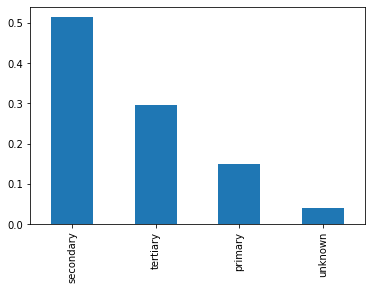

In [22]:
counts_edu.plot.bar()
plt.show()

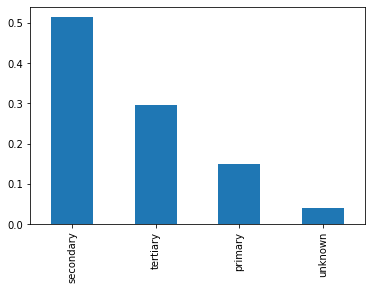

In [23]:
bank1.education.value_counts(normalize=True).plot.bar()
plt.show()

#### Response variable

In [24]:
bank1.response.value_counts(normalize=True)

No     0.884931
Yes    0.115069
Name: response, dtype: float64

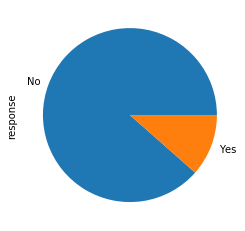

In [25]:
bank1.response.value_counts(normalize=True).plot.pie()
plt.show()

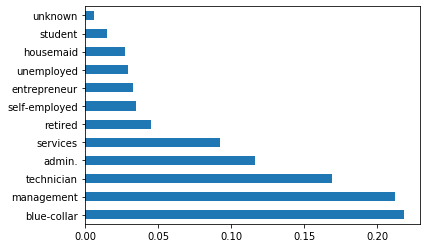

In [26]:
bank1.job.value_counts(normalize=True).plot.barh()
plt.show()

### Numerical variables

In [27]:
bank1.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'poutcome', 'response'],
      dtype='object')

In [28]:
bank1.salary.mean()

57028.01076823815

In [29]:
bank1.salary.describe()

count     44947.000000
mean      57028.010768
std       32159.306816
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

In [30]:
bank1.describe()

,age,salary,balance
count,44947.000000,44947.000000,44947.000000
mean,42.383941,57028.010768,1354.379758
std,8.980146,32159.306816,2997.772198
min,18.000000,0.000000,-8019.000000
25%,36.000000,20000.000000,71.000000
50%,42.000000,60000.000000,446.000000
75%,50.000000,70000.000000,1416.000000
max,75.000000,120000.000000,102127.000000


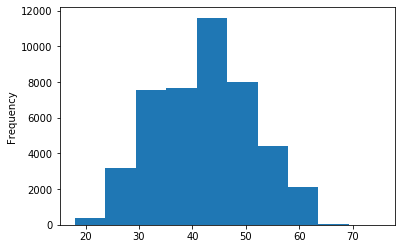

In [31]:
bank1.age.plot.hist()
plt.show()

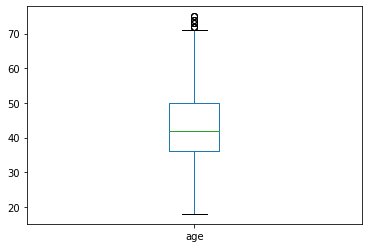

In [32]:
bank1.age.plot.box()
plt.show()

#### Balance variable

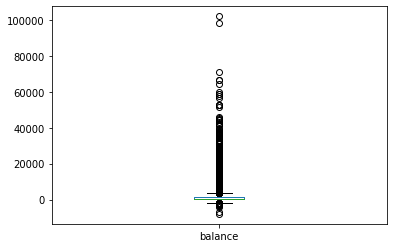

In [33]:
bank1.balance.plot.box()
plt.show()

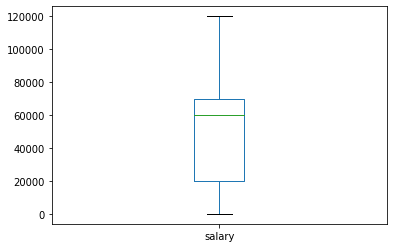

In [34]:
bank1.salary.plot.box()
plt.show()

## Bi-variate analysis
 - Relation between 2 variables

#### Relation between two numeric variables

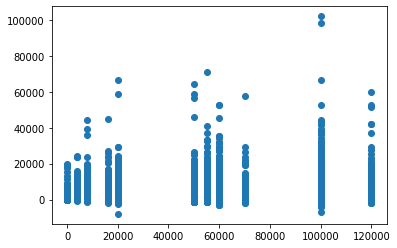

In [35]:
plt.scatter(bank1.salary, bank1.balance)
plt.show()

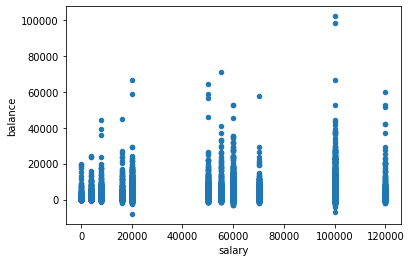

In [36]:
bank1.plot.scatter('salary', 'balance')
plt.show()

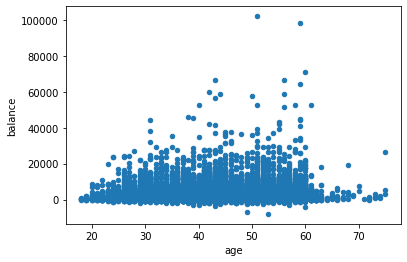

In [37]:
bank1.plot.scatter('age', 'balance')
plt.show()

### Correlation between numeric variables

In [38]:
bank1.corr()

,age,salary,balance
age,1.000000,0.023788,0.073845
salary,0.023788,1.000000,0.056571
balance,0.073845,0.056571,1.000000


### Categorical vs. numeric

In [39]:
bank1.groupby('marital')['salary'].mean()

marital
divorced    60652.385589
married     56215.644194
single      57289.535429
Name: salary, dtype: float64

In [40]:
bank1.groupby('response')['balance'].median()

response
No     416.0
Yes    719.5
Name: balance, dtype: float64

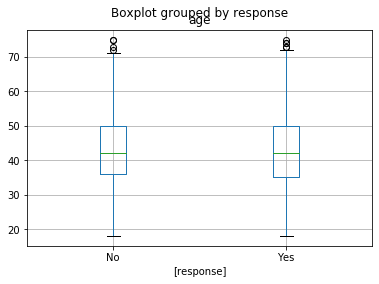

In [41]:
bank1[['response', 'age']].boxplot(by='response')

## Associations with Target variable

In [42]:
bank1.groupby(['marital', 'response']).size()

marital   response
divorced  No           4545
          Yes           590
married   No          24354
          Yes          2672
single    No          10876
          Yes          1910
dtype: int64

### Create indicator variable - response_flag

In [43]:
bank1['response_flag'] = (bank1.response == 'Yes')*1

In [44]:
bank1.response_flag.value_counts(normalize=True)

0    0.884931
1    0.115069
Name: response_flag, dtype: float64

In [45]:
bank1.response.value_counts(normalize=True)

No     0.884931
Yes    0.115069
Name: response, dtype: float64

In [46]:
bank1.response_flag.mean()

0.11506885887823437

#### Success rate by education levels

In [47]:
bank1.groupby('education')['response_flag'].mean()

education
primary      0.078767
secondary    0.104642
tertiary     0.149563
unknown      0.130005
Name: response_flag, dtype: float64

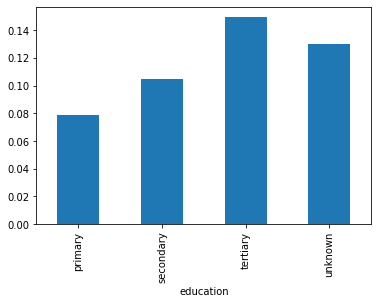

In [48]:
bank1.groupby('education')['response_flag'].mean().plot.bar()
plt.show()

In [49]:
bank1.groupby('housing')['response_flag'].mean()

housing
no     0.163497
yes    0.076859
Name: response_flag, dtype: float64

#### Education x housing loan

In [50]:
pd.pivot_table(data=bank1,
               index='education',
               columns='housing',
               values='response_flag')

housing,no,yes
education,,
primary,0.107725,0.057781
secondary,0.152088,0.073881
tertiary,0.198869,0.096268
unknown,0.180735,0.067402


#### Education x marital x housing loan

In [51]:
pd.pivot_table(data=bank1,
               index=['marital', 'housing'],
               columns='education',
               values='response_flag')

education          primary  secondary  tertiary   unknown
marital  housing                                         
divorced no       0.128358   0.136240  0.179272  0.256410
         yes      0.101093   0.079225  0.096946  0.047619
married  no       0.097618   0.136776  0.175687  0.146623
         yes      0.049603   0.066319  0.077338  0.072243
single   no       0.150289   0.188352  0.238514  0.226708
         yes      0.075397   0.087881  0.123635  0.063107